In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Downloads/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X=df.drop('Outcome', axis=1)
y=df['Outcome']
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [5]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error, r2_score
y_pred=model.predict(X_test)
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("r2 score:",r2_score(y_test,y_pred))

mean squared error: 0.171045272808501
r2 score: 0.2550028117674177


In [6]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train,y_train)
y_pred_tree=tree_reg.predict(X_test)

print("Decision Tree Mean Squared Error:", mean_squared_error(y_test,y_pred_tree))
print("Decision Tree R2 score:", r2_score(y_test,y_pred_tree))


Decision Tree Mean Squared Error: 0.2532467532467532
Decision Tree R2 score: -0.10303030303030325


Epoch 1/10
16/16 [==============================] - 1s 22ms/step - loss: 0.3809 - mean_squared_error: 0.3809 - val_loss: 0.4020 - val_mean_squared_error: 0.4020
Epoch 2/10
16/16 [==============================] - 0s 6ms/step - loss: 0.3239 - mean_squared_error: 0.3239 - val_loss: 0.3702 - val_mean_squared_error: 0.3702
Epoch 3/10
16/16 [==============================] - 0s 6ms/step - loss: 0.3129 - mean_squared_error: 0.3129 - val_loss: 0.3594 - val_mean_squared_error: 0.3594
Epoch 4/10
16/16 [==============================] - 0s 5ms/step - loss: 0.3047 - mean_squared_error: 0.3047 - val_loss: 0.3495 - val_mean_squared_error: 0.3495
Epoch 5/10
16/16 [==============================] - 0s 5ms/step - loss: 0.2968 - mean_squared_error: 0.2968 - val_loss: 0.3408 - val_mean_squared_error: 0.3408
Epoch 6/10
16/16 [==============================] - 0s 6ms/step - loss: 0.2896 - mean_squared_error: 0.2896 - val_loss: 0.3324 - val_mean_squared_error: 0.3324
Epoch 7/10
16/16 [=====================

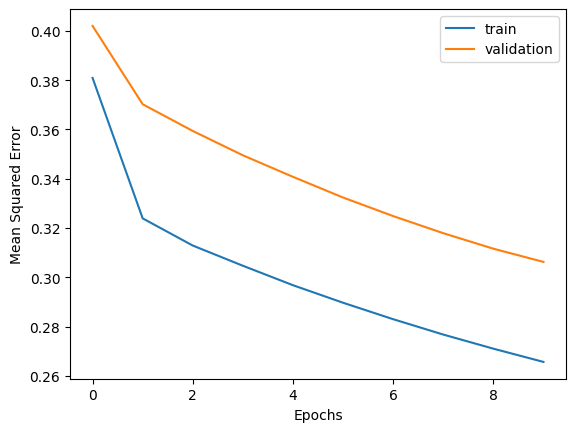

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
ann=Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(2, activation='relu'),
    Dense(1)
])

ann.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])

history=ann.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)

y_pred_ann=ann.predict(X_test)

print("Mean squared error:",mean_squared_error(y_test,y_pred_ann))

plt.plot(history.history['mean_squared_error'],label='train')
plt.plot(history.history['val_mean_squared_error'],label='validation')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [10]:
import tensorflow as tf
input_shape=(X_train.shape[1],)
tf.print(input_shape)

(8,)
